
link:https://archive.ics.uci.edu/dataset/19/car+evaluation

In [ ]:
#Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score,classification_report
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Reading the car evaulation dataset
car_eval_df=pd.read_csv(r"C:\\RadhaCar_Evaluation_Analysis\Car_Data.csv")

In [ ]:
#Assigning the numerical value to the dependent variable
conditions0=[
    car_eval_df['Class']=='unacc',
    car_eval_df['Class']=='acc',
    car_eval_df['Class']=='good',
    car_eval_df['Class']=='vgood'

]
values0=[0,1,2,3]
car_eval_df['Class_Cat']=np.select(conditions0,values0)

In [ ]:
car_eval_df['Class_Cat'].unique()

array([0, 1, 3, 2])

In [ ]:
car_eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Buying        1728 non-null   object
 1   Maintenance   1728 non-null   object
 2   Doors         1728 non-null   int64 
 3   Persons       1728 non-null   int64 
 4   Luggage_boot  1728 non-null   object
 5   Safety        1728 non-null   object
 6   Class         1728 non-null   object
 7   Class_Cat     1728 non-null   int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 101.4+ KB


In [ ]:
#Changing the null values in the dataset with 0
car_eval_df=car_eval_df.fillna(0)

In [ ]:
# Assigning the independent variables and dependent variable
feature = car_eval_df.drop(['Class','Class_Cat'],axis=1)
target = car_eval_df.loc[:,'Class_Cat']

In [ ]:
#Convert the categorical variables to dummy variables
Buying = pd.get_dummies(feature['Buying'],drop_first=True)
Maintenance=pd.get_dummies(feature['Maintenance'],drop_first=True)
Luggage_boot=pd.get_dummies(feature['Luggage_boot'],drop_first=True)
Safety=pd.get_dummies(feature['Safety'],drop_first=True)

In [ ]:
#Keeping required feature variables
feature.drop(['Buying','Maintenance','Luggage_boot','Safety'],axis=1,inplace=True)

In [ ]:
#Concatenating  the feature variable with created dummies
feature = pd.concat([feature,Buying,Maintenance,Luggage_boot,Safety],axis=1)

In [ ]:
#Segregating the dataset into training data and test data
X_train,X_test,Y_train,Y_test = train_test_split(feature, target ,test_size=0.25,random_state=10)

In [ ]:
#Random forest algorithm
import warnings
with warnings.catch_warnings(record=True):
    randm_for_algrthm= RandomForestClassifier(random_state=2)
    randm_for_algrthm.fit(X_train,Y_train)
    Y_pred1=randm_for_algrthm.predict(X_test)
    print('Classification Report of Random Forest->\n',classification_report(Y_test, Y_pred1))
    print('Mean Absolute Error of Random Forest->', mean_absolute_error(Y_test, Y_pred1))
    print('Root Mean Squared Error of Random Forest->', np.sqrt(mean_squared_error(Y_test, Y_pred1)))
    print('R-squared value of Random Forest->',r2_score(Y_test, Y_pred1))

Classification Report of Random Forest->
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       307
           1       0.90      0.96      0.93        84
           2       0.75      0.63      0.69        19
           3       0.95      0.95      0.95        22

    accuracy                           0.97       432
   macro avg       0.90      0.88      0.89       432
weighted avg       0.96      0.97      0.96       432

Mean Absolute Error of Random Forest-> 0.037037037037037035
Root Mean Squared Error of Random Forest-> 0.2041241452319315
R-squared value of Random Forest-> 0.934826337669304


In [ ]:
#Decision Tree algorithm
import warnings
with warnings.catch_warnings(record=True):
    dcsn_tree_algrthm= DecisionTreeClassifier()
    dcsn_tree_algrthm.fit(X_train,Y_train)
    Y_pred2=dcsn_tree_algrthm.predict(X_test)
    print('Classification Report of Decision Tree->\n',classification_report(Y_test, Y_pred2))
    print('Mean Absolute Error of Decision Tree->', mean_absolute_error(Y_test, Y_pred2))
    print('Root Mean Squared Error of Decision Tree->', np.sqrt(mean_squared_error(Y_test, Y_pred2)))
    print('R-squared value of Decision Tree->',r2_score(Y_test, Y_pred2))

Classification Report of Decision Tree->
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       0.96      0.95      0.96        84
           2       0.71      0.89      0.79        19
           3       1.00      0.82      0.90        22

    accuracy                           0.97       432
   macro avg       0.92      0.92      0.91       432
weighted avg       0.98      0.97      0.98       432

Mean Absolute Error of Decision Tree-> 0.02546296296296296
Root Mean Squared Error of Decision Tree-> 0.15957118462605635
R-squared value of Decision Tree-> 0.960171650797908


In [ ]:
#K Nearest Neighbour algorithm
import warnings
with warnings.catch_warnings(record=True):
    knn_algrthm=  KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', p = 2)
    knn_algrthm.fit(X_train,Y_train)
    Y_pred3=knn_algrthm.predict(X_test)
    print('Classification Report of K Nearest Neighbour->\n',classification_report(Y_test, Y_pred3))
    print('Mean Absolute Error of K Nearest Neighbour->', mean_absolute_error(Y_test, Y_pred3))
    print('Root Mean Squared Error of K Nearest Neighbour->', np.sqrt(mean_squared_error(Y_test, Y_pred3)))
    print('R-squared value of K Nearest Neighbour->',r2_score(Y_test, Y_pred3))

Classification Report of K Nearest Neighbour->
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       307
           1       0.63      0.69      0.66        84
           2       0.29      0.11      0.15        19
           3       0.88      0.32      0.47        22

    accuracy                           0.84       432
   macro avg       0.67      0.52      0.55       432
weighted avg       0.82      0.84      0.82       432

Mean Absolute Error of K Nearest Neighbour-> 0.22685185185185186
Root Mean Squared Error of K Nearest Neighbour-> 0.6273105439242341
R-squared value of K Nearest Neighbour-> 0.3844709668767602


In [ ]:
#Principal Component Analysis Clustering
pca = PCA()
vlues = feature.values
pca.fit(vlues)
car_pca = pca.transform(vlues)

Text(0.5, 0, 'PC 1')

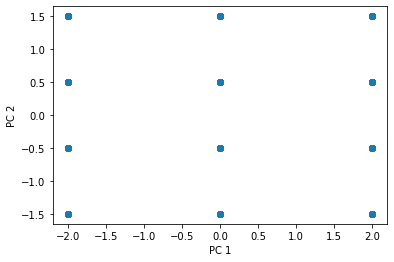

In [ ]:
#Scatter visualisation for PC1 vs PC2
axis = plt.gca()
axis.scatter(car_pca[:,0], car_pca[:,1])
axis.set_ylabel('PC 2')
axis.set_xlabel('PC 1')

[Text(0, 0, 'PC0'),
 Text(1, 0, 'PC1'),
 Text(2, 0, 'PC2'),
 Text(3, 0, 'PC3'),
 Text(4, 0, 'PC4'),
 Text(5, 0, 'PC5'),
 Text(6, 0, 'PC6'),
 Text(7, 0, 'PC7'),
 Text(8, 0, 'PC8'),
 Text(9, 0, 'PC9'),
 Text(10, 0, 'PC10'),
 Text(11, 0, 'PC11')]

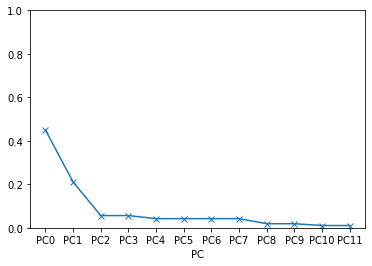

In [ ]:
#Scree plot visualisation
axis = plt.gca()
explain_varnce = pca.explained_variance_ratio_
axis.plot(explain_varnce, marker='x')
axis.set_ylim(0,1.)
axis.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
axis.set_xlabel('PC')
axis.set_xticklabels(["PC{}".format(i) for i in range(12)])

In [ ]:
#Variance explanation output
print("Variance explanation by principal components:",explain_varnce)

Variance explanation by principal components: [0.44964871 0.21077283 0.05620609 0.05620609 0.04215457 0.04215457
 0.04215457 0.04215457 0.01873536 0.01873536 0.01053864 0.01053864]
